<a href="https://colab.research.google.com/github/tk03145/tharun_INFO5502_SPRING2022/blob/main/lab_assignment_08_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The eighth Lab-assignment (04/07/2022, 50 points in total)

The purpose of this exercise is to understand how to conduct Sampling and Distributions. The data used in this lab assignment will contain salary data and other statistics for basketball players from the 2014-2015 NBA season. This data was collected from the following sports analytic sites: [Basketball Reference](http://www.basketball-reference.com) and [Spotrac](http://www.spotrac.com). The dataset of this assignment can be downloaded from github: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab-assignment-8

First, set up the tests and imports by running the cell below.

In [ ]:

!pip install datascience

In [ ]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


Run the cell below to load player and salary data that we will use for our sampling.

In [ ]:
p_d = Table().read_table("player_data.csv")
s_d = Table().read_table("salary_data.csv")
f_d = s_d.join("PlayerName", p_d, "Name")
p_d.show(5)
s_d.show(5)
f_d.show(5)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900
Anthony Davis,21,NOP,68,696,149,100,200,95,1656
DeAndre Jordan,26,LAC,82,1226,61,81,183,109,946


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790
Carmelo Anthony,22458401
Dwight Howard,21436271


PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243
Adreian Payne,1855320,23,TOT,32,162,30,19,9,44,213
Al Horford,12000000,28,ATL,76,544,244,68,98,100,1156


Rather than getting data on every player (as in the tables loaded above), imagine that we had gotten data on only a smaller subset of the players. For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky.

If we want to make estimates about a certain numerical property of the population (known as a statistic, e.g. the mean or median), we may have to come up with these estimates based only on a smaller sample. Whether these estimates are useful or not often depends on how the sample was gathered. We have prepared some example sample datasets to see how they compare to the full NBA dataset. Later we'll ask you to create your own samples to see how they behave.

To save typing and increase the clarity of your code, we will package the analysis code into a few functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data.

We've defined the histograms function below, which takes a table with columns Age and Salary and draws a histogram for each one. It uses bin widths of 1 year for Age and $1,000,000 for Salary.

Two histograms should be displayed below


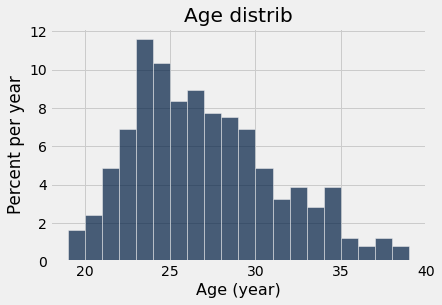

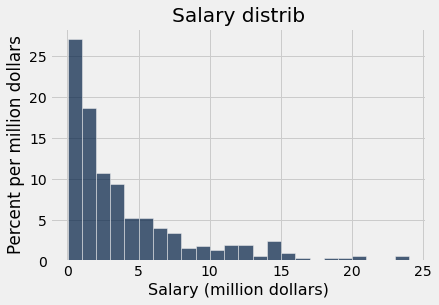

In [ ]:
def histograms(t):
    a = t.column('Age')
    s = t.column('Salary')/1000000
    ta = t.drop('Salary').with_column('Salary', s)
    a_bins = np.arange(min(a), max(a) + 2, 1) 
    s_bins = np.arange(min(s), max(s) + 1, 1)
    ta.hist('Age', bins=a_bins, unit='year')
    plt.title('Age distrib')
    ta.hist('Salary', bins=s_bins, unit='million dollars')
    plt.title('Salary distrib') 
    
histograms(f_d)
print('Two histograms should be displayed below')

### Question 1 (10 points) 

Create a function called compute_statistics that takes a table containing ages and salaries and:

(1) Draws a histogram of ages

(2) Draws a histogram of salaries

(3) Returns a two-element array containing the average age and average salary (in that order)


You can call the histograms function to draw the histograms!

Note: More charts will be displayed when running the test cell. Please feel free to ignore the charts.

In [ ]:
import statistics

array([2.65365854e+01, 4.26977577e+06])

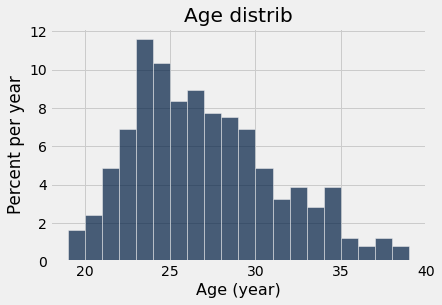

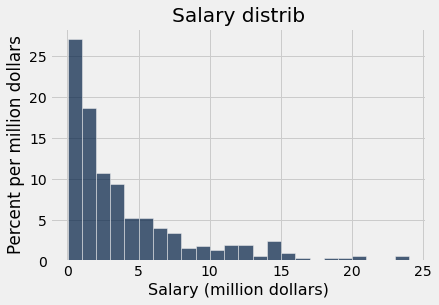

In [ ]:
def compute_statistics(a_and_s_d):
    ...
    a=sum(a_and_s_d['Age'])/len(a_and_s_d['Age'])
    s=sum(a_and_s_d['Salary'])/len(a_and_s_d['Salary'])
    histograms(a_and_s_d)
    return make_array(a,s)
    ...
    

f_s = compute_statistics(f_d)
f_s



In [ ]:
stats = compute_statistics(f_d)
plt.close()
plt.close()
round(float(stats[0]), 2) == 26.54



True

In [ ]:
# TEST
s = compute_statistics(f_d)
plt.close()
plt.close()
round(float(stats[1]), 2) == 4269775.77



True

### Question 2 (10 points) Convenience sampling

One sampling methodology, which is generally a bad idea, is to choose players who are somehow convenient to sample. For example, you might choose players from one team who are near your house, since it's easier to survey them. This is called, somewhat pejoratively, convenience sampling.

Suppose you survey only relatively new players with ages less than 22. (The more experienced players didn't bother to answer your surveys about their salaries.)

Assign `convenience_sample` to a subset of `full_data` that contains only the rows for players under the age of 22.

In [ ]:
c_s = f_d.where("Age",are.below(22))
c_s





PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243
Alex Len,3649920,21,PHO,69,454,32,34,105,74,432
Andre Drummond,2568360,21,DET,82,1104,55,73,153,120,1130
Andrew Wiggins,5510640,19,MIN,82,374,170,86,50,177,1387
Anthony Bennett,5563920,21,MIN,57,216,48,27,16,36,298
Anthony Davis,5607240,21,NOP,68,696,149,100,200,95,1656
Archie Goodwin,1112280,20,PHO,41,74,44,18,9,48,231
Ben McLemore,3026280,21,SAC,82,241,140,77,19,138,996
Bradley Beal,4505280,21,WAS,63,241,194,76,18,123,962
Bruno Caboclo,1458360,19,TOR,8,2,0,0,1,4,10


In [ ]:
# TEST
c_s.num_columns == 11



True

In [ ]:
# TEST
c_s.num_rows == 44



True

### Question 3 (10 points) 

Assign convenience_stats to an array of the average age and average salary of your convenience sample, using the compute_statistics function. Since they're computed on a sample, these are called sample averages.

array([2.03636364e+01, 2.38353382e+06])

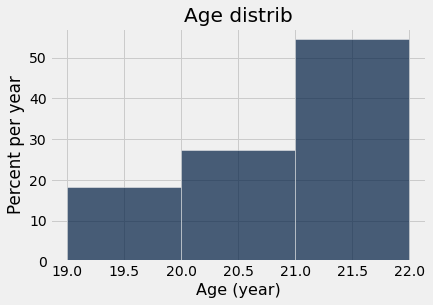

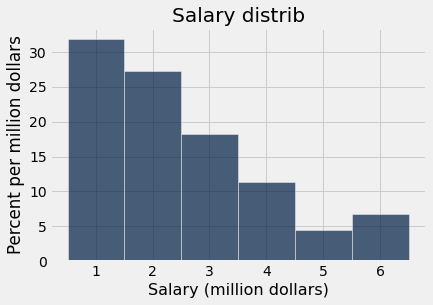

In [ ]:
c_st = compute_statistics(c_s) 
c_st



In [ ]:
# TEST
len(c_st) == 2



True

In [ ]:
# TEST 
round(float(c_st[0]), 2) == 20.36



True

In [ ]:
# TEST
round(float(c_st[1]), 2) == 2383533.82



True

Next, we'll compare the convenience sample salaries with the full data salaries in a single histogram. To do that, we'll need to use the bin_column option of the hist method, which indicates that all columns are counts of the bins in a particular column. The following cell does not require any changes; just run it.

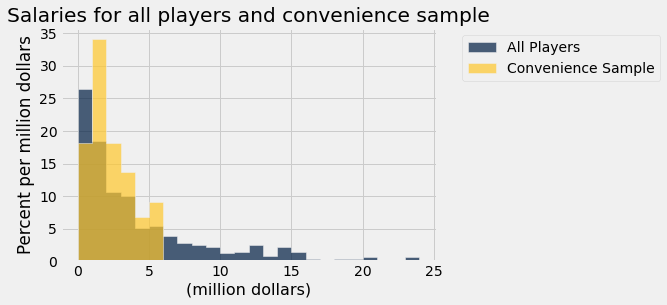

In [ ]:
def compare_salaries(first, second, f_t, s_t):
    f_s_in_millions = first.column('Salary')/1000000
    s_s_in_millions = second.column('Salary')/1000000
    f_tbl_millions = first.drop('Salary').with_column('Salary', f_s_in_millions)
    s_tbl_millions = second.drop('Salary').with_column('Salary', s_s_in_millions)
    max_salary = max(np.append(f_tbl_millions.column('Salary'), s_tbl_millions.column('Salary')))
    bins = np.arange(0, max_salary+1, 1)
    f_b = f_tbl_millions.bin('Salary', bins=bins).relabeled(1, f_t)
    s_b = s_tbl_millions.bin('Salary', bins=bins).relabeled(1, s_t)
    f_b.join('bin', s_b).hist(bin_column='bin', unit='million dollars')
    plt.title('Salaries for all players and convenience sample')

compare_salaries(f_d, c_s, 'All Players', 'Convenience Sample')

### Question 4 (10 points) 
Does the convenience sample give us an accurate picture of the salary of the full population? Would you expect it to, in general? Before you move on, write a short answer in English below. You can refer to the statistics calculated above or perform your own analysis.

In [8]:
"""
Answer: from the above histogram i.e salaries for all the players and convenience sample i conclude that , no it doesn't give the excat sampling because we have taken data for players with age below 22



"""

"\nAnswer: from the above histogram i.e salaries for all the players and convenience sample i conclude that , no it doesn't give the excat sampling because we have taken data for players with age below 22\n\n\n\n"

### Simple random sampling
A more justifiable approach is to sample uniformly at random from the players.  In a **simple random sample (SRS) without replacement**, we ensure that each player is selected at most once. Imagine writing down each player's name on a card, putting the cards in an box, and shuffling the box.  Then, pull out cards one by one and set them aside, stopping when the specified sample size is reached.

### Producing simple random samples
Sometimes, it’s useful to take random samples even when we have the data for the whole population. It helps us understand sampling accuracy.

### `sample`

The table method `sample` produces a random sample from the table. By default, it draws at random **with replacement** from the rows of a table. It takes in the sample size as its argument and returns a **table** with only the rows that were selected. 

Run the cell below to see an example call to `sample()` with a sample size of 5, with replacement.

In [ ]:
s_d.sample(5)

PlayerName,Salary
Devyn Marble,884879
Monta Ellis,8360000
Kemba Walker,3272091
Solomon Hill,1302840
Ronny Turiaf,1500000


The optional argument with_replacement=False can be passed through sample() to specify that the sample should be drawn without replacement.

Run the cell below to see an example call to sample() with a sample size of 5, without replacement.

In [ ]:
s_d.sample(5, with_replacement=False)

PlayerName,Salary
Gal Mekel,816482
Blake Griffin,17674613
Darrell Arthur,3457149
Festus Ezeli,1112880
Nick Calathes,816482


### Question 5 (10 points) 
Produce a simple random sample of size 44 from `full_data`. Run your analysis on it again.  Run the cell a few times to see how the histograms and statistics change across different samples.

array([2.67954545e+01, 4.59999018e+06])

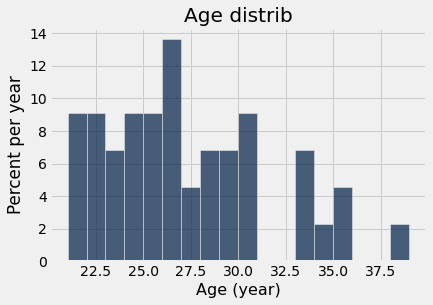

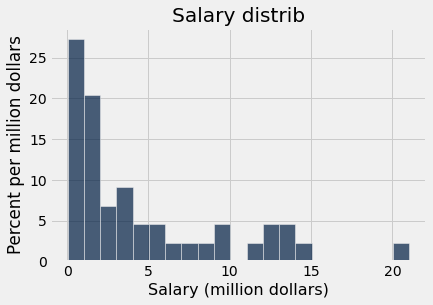

In [ ]:
a = f_d.sample(44, with_replacement=False)
b = compute_statistics(a)
b


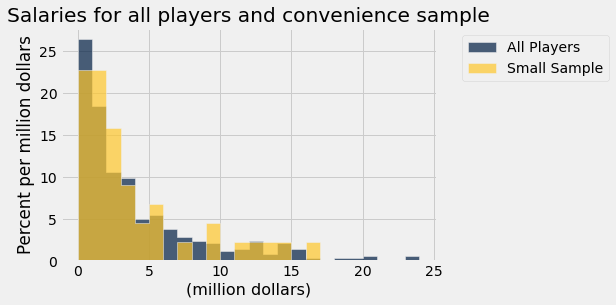

In [ ]:
a = f_d.sample(44, with_replacement=False)
b = compare_salaries(f_d, a, 'All Players', 'Small Sample')
b


for the iteration 0 the stats are : [2.66363636e+01 4.04110814e+06]
for the iteration 1 the stats are : [2.68181818e+01 4.50272632e+06]
for the iteration 2 the stats are : [2.675000e+01 3.529024e+06]
for the iteration 3 the stats are : [2.63409091e+01 3.55861134e+06]
for the iteration 4 the stats are : [2.52727273e+01 3.11876225e+06]
for the iteration 5 the stats are : [2.60227273e+01 3.90321789e+06]
for the iteration 6 the stats are : [2.65681818e+01 4.63143364e+06]
for the iteration 7 the stats are : [2.66590909e+01 3.32628866e+06]
Medians over the samples for age are : [25.5 26.  27.  26.5 24.  24.5 26.5 26. ]
Medians over the samples for salary are : [2732000. 2890960. 1753260. 1618260. 2106720. 1857900. 2912940. 1545540.]


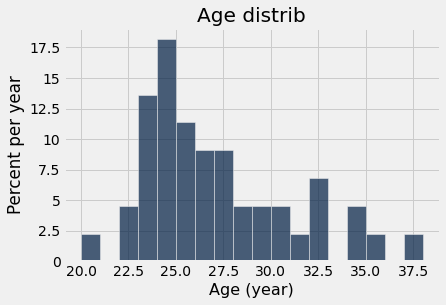

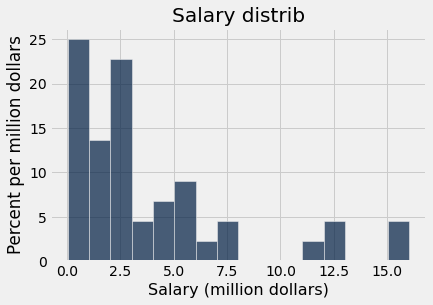

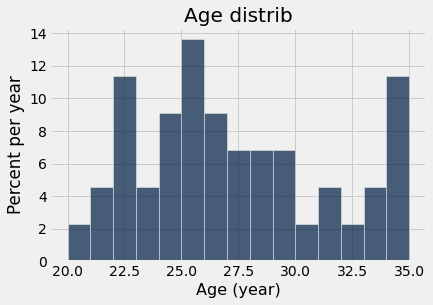

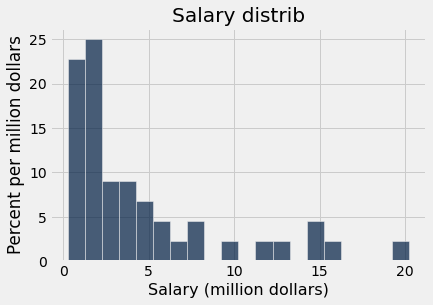

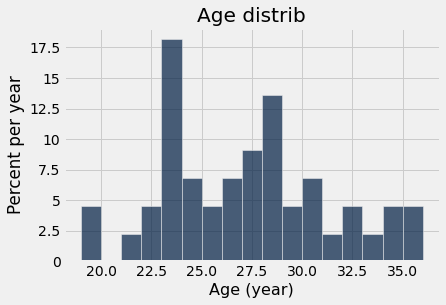

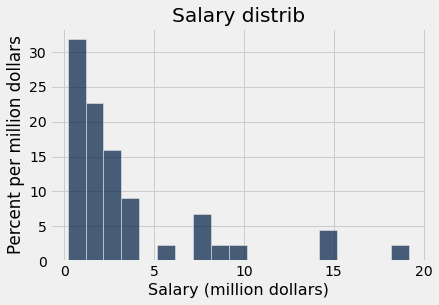

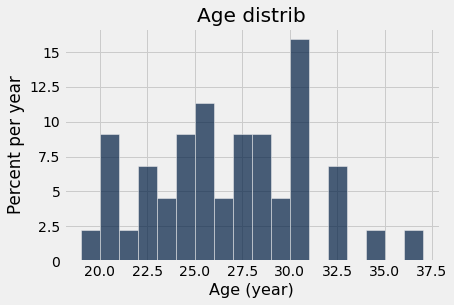

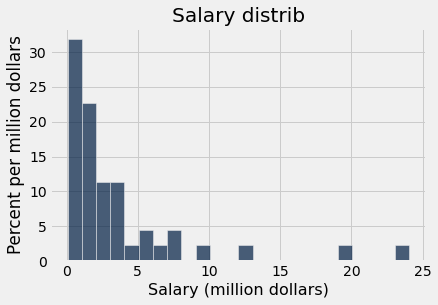

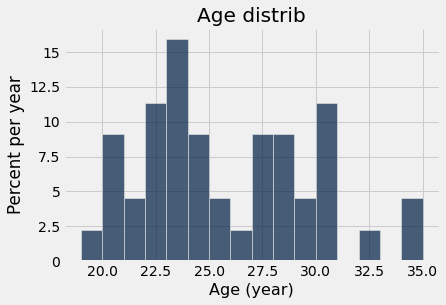

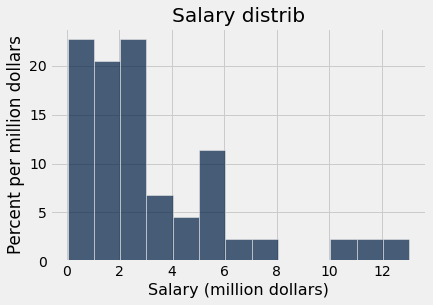

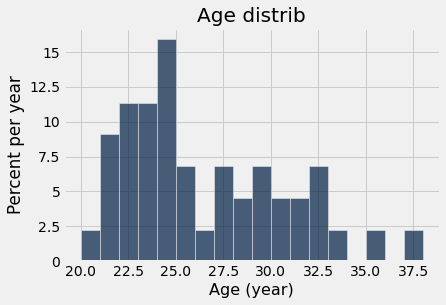

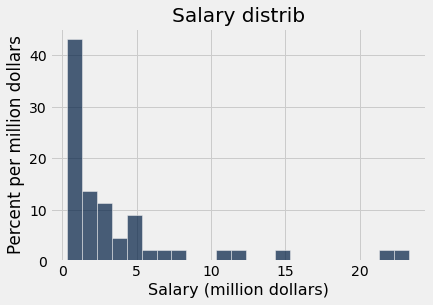

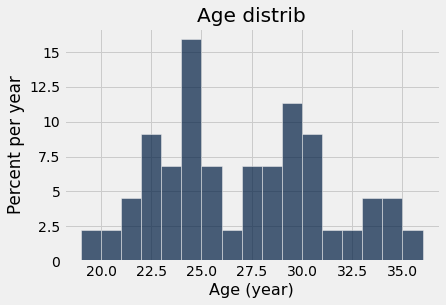

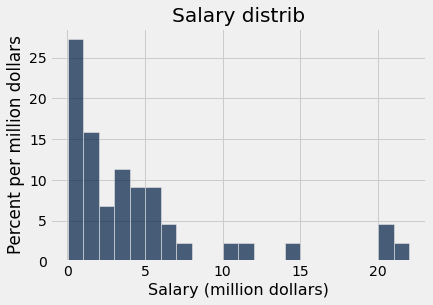

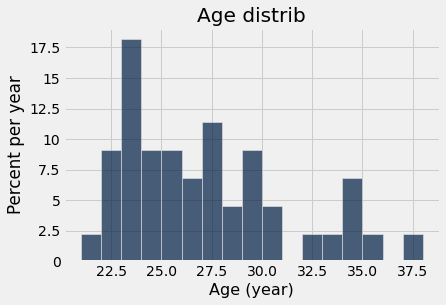

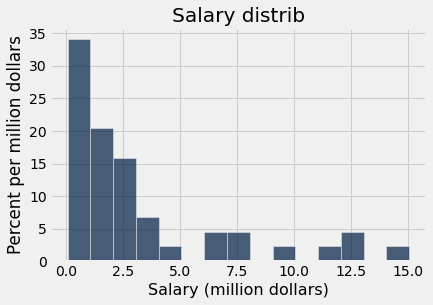

In [ ]:
m = make_array()
n = make_array()
for i in range(8):
 a = f_d.sample(44, with_replacement=False)
 med_age=np.median(a['Age'])
 med_salary=np.median(a['Salary'])
 my_small_stats = compute_statistics(a)
 m = np.append(m, med_age)
 n = np.append(n, med_salary)
 print("for the iteration" ,i,"the stats are :",my_small_stats)
print("Medians over the samples for age are :",m)
print("Medians over the samples for salary are :",n)

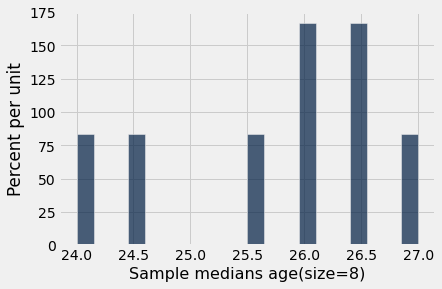

In [ ]:
Table().with_column('Sample medians age(size=8)', m).hist(bins=20)

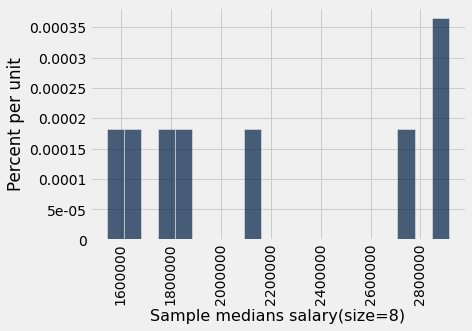

In [ ]:
Table().with_column('Sample medians salary(size=8)', n).hist(bins=20)

Before you move on, write a short answer for the following questions in English:

(1) How much does the average age change across samples?

(2) What about average salary?

In [6]:
"""
Answer: from the above histogram i have studied the following results:
 1) the average age of the players does not varies much
 2) the average salary of the players varies a large amount


"""

'\nAnswer: from the above histogram i have studied the following results:\n 1) the average age of the players does not varies much\n 2) the average salary of the players varies a large amount\n\n\n'

### Question 6 (5 extra points) 
As in the previous question, analyze several simple random samples of size 100 from `full_data`.  

for the iteration 0 the stats are : [2.617000e+01 3.379911e+06]
for the iteration 1 the stats are : [2.62200000e+01 4.30881232e+06]
for the iteration 2 the stats are : [2.6620000e+01 4.5005927e+06]
for the iteration 3 the stats are : [2.67300000e+01 4.36105523e+06]
for the iteration 4 the stats are : [2.74000000e+01 5.34510903e+06]
for the iteration 5 the stats are : [2.62500000e+01 4.95281367e+06]
for the iteration 6 the stats are : [2.67200000e+01 3.61142241e+06]
for the iteration 7 the stats are : [2.61200000e+01 4.33005452e+06]


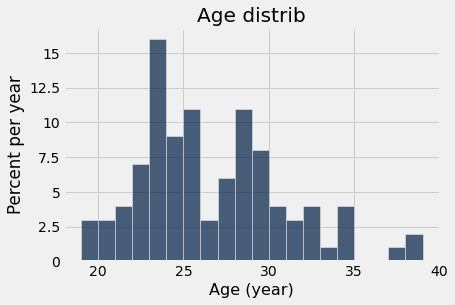

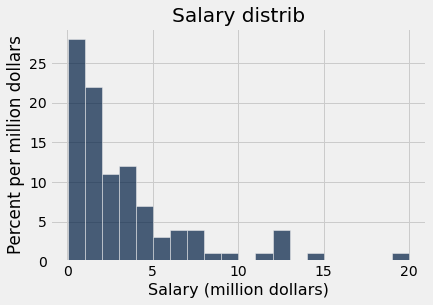

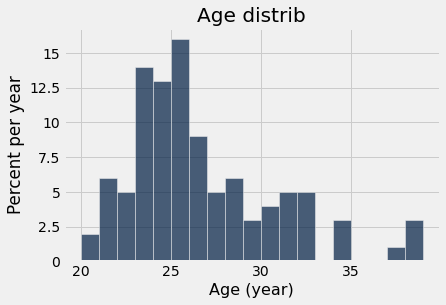

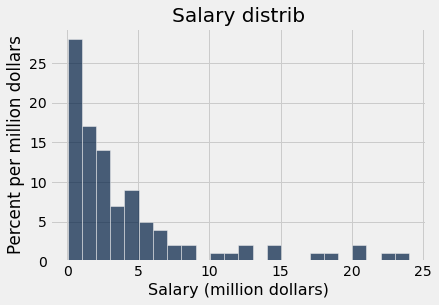

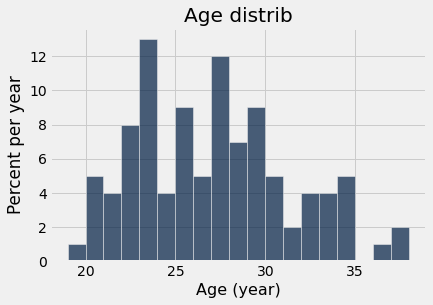

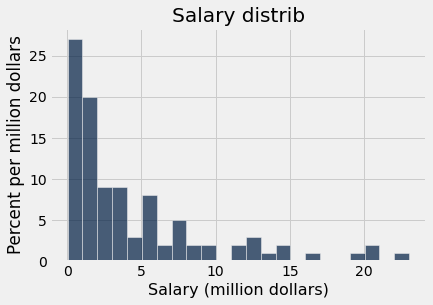

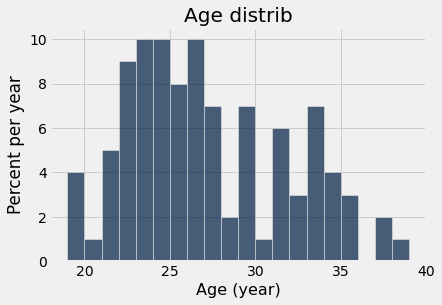

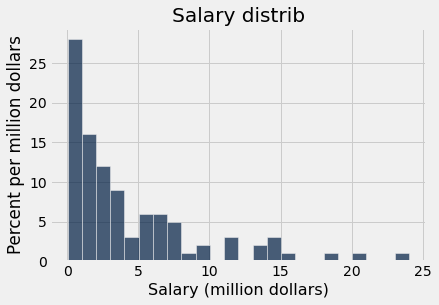

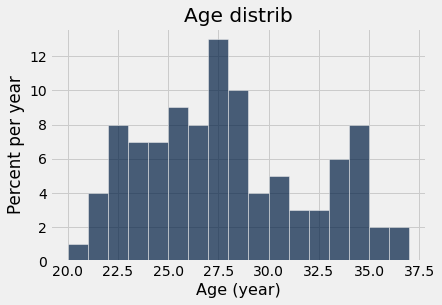

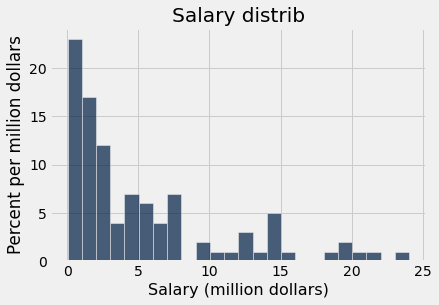

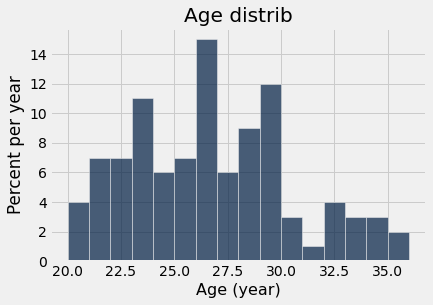

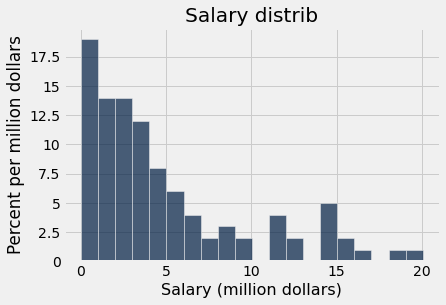

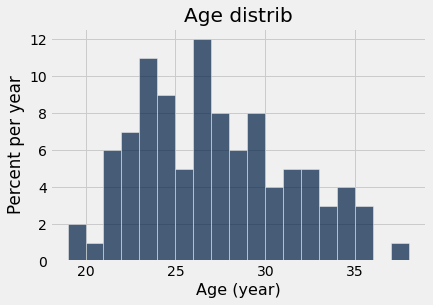

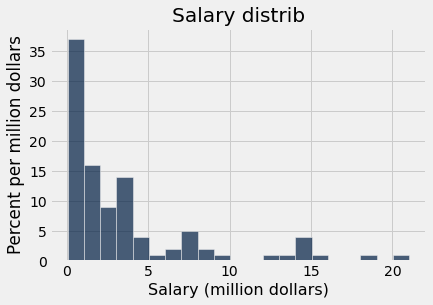

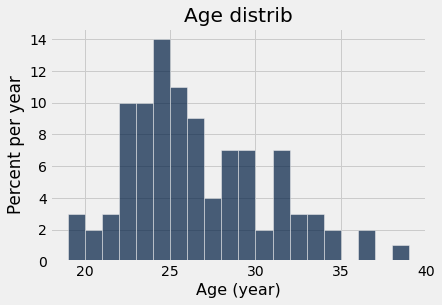

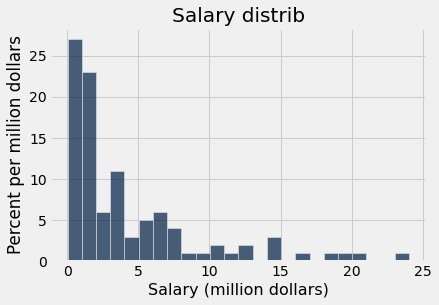

In [ ]:
for i in range(8):
 a = f_d.sample(100, with_replacement=False)
 b  = compute_statistics(a)
 print("for the iteration" ,i,"the stats are :",b)


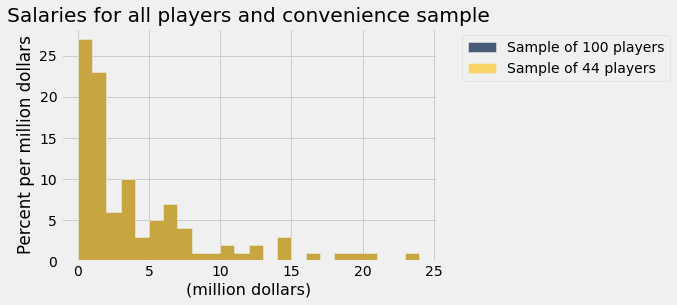

In [ ]:

b = compare_salaries(a, a, 'Sample of 100 players', 'Sample of 44 players')
b

Answer the following questions in English:

(1) Do the histogram shapes seem to change more or less across samples of 100 than across samples of size 44?

(2) Are the sample averages and histograms closer to their true values/shape for age or for salary? What did you expect to see?

In [7]:


"""
Answer: from the above histogram i have conclude the following results
1) there is some diffrence in between 44 samples and 100 samples from the histogram
2)here from the above histogram the 100th sample is very close to the main histogram




"""

'\nAnswer: from the above histogram i have conclude the following results\n1) there is some diffrence in between 44 samples and 100 samples from the histogram\n2)here from the above histogram the 100th sample is very close to the main histogram\n\n\n\n\n'